theta: The long axis was determined by eye previously. You should come up with a method
to find it with methodically.

inclination: A face on disk (zero inclination) is a circle but most galaxies here look like ellipses because the disk is inclined from our viewpoint. You should come up with a way to estimate the inclination of your galax

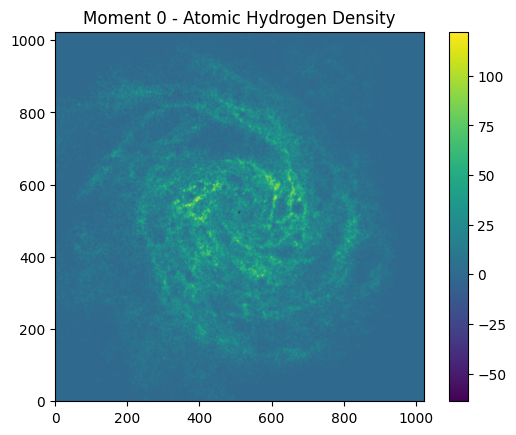

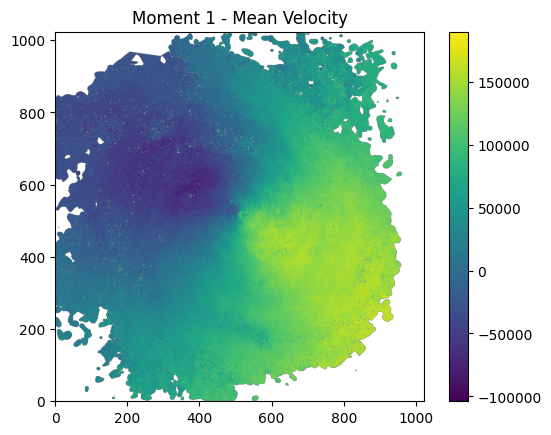

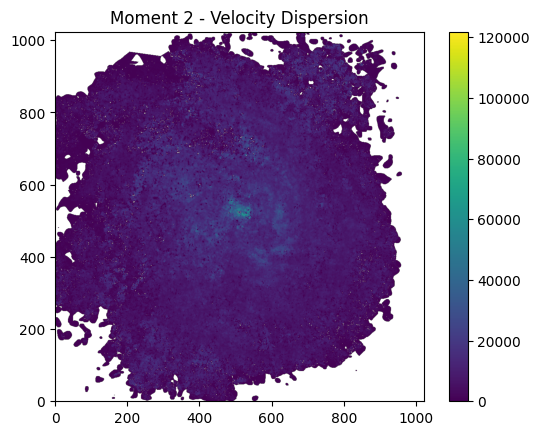

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits

# We are analyzing NGC 6946 for part 2 
dat0 = fits.open("https://www2.mpia-hd.mpg.de/THINGS/Data_files/NGC_6946_NA_MOM0_THINGS.FITS")
dat1 = fits.open("https://www2.mpia-hd.mpg.de/THINGS/Data_files/NGC_6946_NA_MOM1_THINGS.FITS")
dat2 = fits.open("https://www2.mpia-hd.mpg.de/THINGS/Data_files/NGC_6946_NA_MOM2_THINGS.FITS")
data0 = dat0[0].data[0][0] # save image to 2d numpy array
data1 = dat1[0].data[0][0] 
data2 = dat2[0].data[0][0]

plt.imshow(data0, origin = "lower" ) # plot 2d data array
plt.title("Moment 0 - Atomic Hydrogen Density")
plt.colorbar()
plt.show()

plt.imshow(data1, origin = "lower")
plt.title("Moment 1 - Mean Velocity")
plt.colorbar()
plt.show()

plt.imshow(data2, origin = "lower")
plt.title("Moment 2 - Velocity Dispersion")
plt.colorbar()
plt.show()

In [ ]:
# Determining Theta
# first, get data into workable format. 
# let's learn a bit about the dataset first. 

#print(data1.size, " = total items")
#print(data1.ndim," = array dim")
#print(data1.shape, " = shape of array (columns, rows)")

# there are 1048576 total items in the array. The dimension is 2,
# and shape (1024, 1024)
# we are working with a square matrix - helpful. 
row = 500
col = 500
import sys
with np.printoptions(threshold=sys.maxsize, linewidth=sys.maxsize):
    data1_row = data1[:, row]
    data1_col = data1[col ,:]
    data1_nonan_row = np.abs(data1_row[~np.isnan(data1_row)])
    data1_nonan_col = np.abs(data1_col[~np.isnan(data1_col)])
    print("Sum of entries across row", row," = ", np.sum(data1_nonan_row))
    print("Sum of entries across col", col, " = ", np.sum(data1_nonan_col))
   
# so we can get the total sum of one row or column of pixels. 
# now, we need a way to sum across rows and columns, i.e. diagonals. 
# let's try: [1,1]+[2,2]+[3,3]..... sum(i,i) for (i,j)
# This one is really easy .. it's the trace! 
# here is the numpy function: 
# numpy.trace(a, offset=0, axis1=0, axis2=1, dtype=None, out=None)  
# before, we could just remove the nans, but now we want to keep the array's dimensions. 
# we'll use numpy.nan_to_num and numpy.abs 

data1_nonan = np.nan_to_num(data1)
data1_nonan_abs = np.abs(data1_nonan)
Offset = 50
print(np.trace(data1_nonan_abs, offset = Offset), " = sum of diagonal entries " \
"with offset", Offset)

# so the offset moves the trace "up" and "down" - as in the trace "angle" stays the same, 
# but the first point being summed moves up or down a column. 
# I could also get the "anti-trace" by using np.flip and taking the trace there. 
# now, I can get 4 different lines crossing the center of the image. 
# still not sure how to change the angles. 



Sum of entries across row 500  =  46362120.0
Sum of entries across col 500  =  69766290.0
49553628.0  = sum of diagonal entries with offset 50
